# Evaluating Model Performance - Classification
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Preparing the Dataset

In [2]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.sample(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
13078,13082,30,Private,158002,Some-college,10,Never-married,Craft-repair,Other-relative,White,Male,0.0,0.0,55.0,Ecuador,<=50K
29973,5155,19,Private,202951,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K.
13799,13804,51,Private,220019,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
30294,5476,24,?,324469,Some-college,10,Never-married,?,Not-in-family,White,Female,0.0,0.0,38.0,United-States,<=50K.
9340,9343,20,Private,262749,Some-college,10,Never-married,Other-service,Own-child,White,Male,0.0,0.0,35.0,United-States,<=50K
10999,11002,25,Private,197036,10th,6,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
39717,14902,26,Private,216225,Assoc-acdm,12,Married-civ-spouse,Sales,Wife,White,Female,0.0,0.0,50.0,United-States,>50K.
15969,15975,57,Private,32365,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
4228,4228,38,Private,96330,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
8605,8607,22,?,246386,HS-grad,9,Never-married,?,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K


In [3]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [4]:
data.dropna(how='any', axis=0, inplace=True)

In [5]:
data['class'].replace(' >50K.', ' >50K')
data['class'].replace(' <=50K.', ' <=50K')
data['y_act'] = np.where(data['class']==' >50K',1,0)

In [6]:
data[['class', 'y_act']].sample(10)

,class,y_act
9254,<=50K,0
2183,<=50K,0
27958,<=50K.,0
24964,<=50K.,0
8169,<=50K,0
39412,<=50K.,0
36957,<=50K.,0
28987,<=50K.,0
40258,<=50K.,0
31538,<=50K.,0


In [7]:
data[['class', 'y_act']].value_counts()

class    y_act
 <=50K   0        18867
 <=50K.  0        12430
 >50K    1         5951
 >50K.   0         3846
dtype: int64

In [8]:
X_variables = ['age',  'hours_per_week', 'education_num']
data[X_variables].head()

,age,hours_per_week,education_num
0,39,40.0,13
1,50,13.0,13
2,38,40.0,9
3,53,40.0,7
4,28,40.0,13


In [9]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [10]:
X = data[X_variables].values
X

array([[39., 40., 13.],
       [50., 13., 13.],
       [38., 40.,  9.],
       ...,
       [38., 50., 13.],
       [44., 40., 13.],
       [35., 60., 13.]])

In [11]:
y = data[y_varibale].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
# Create model object
model = LogisticRegression()

# Train Model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predict Probability
model.predict_proba(X_test)[:5]

array([[0.93424867, 0.06575133],
       [0.91225889, 0.08774111],
       [0.93501622, 0.06498378],
       [0.94900601, 0.05099399],
       [0.86769506, 0.13230494]])

In [15]:
# Predict Class
model.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

In [16]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
7397,0,0,0.079319
11721,0,0,0.064984
413,1,0,0.118628
3537,0,0,0.094484
6999,0,0,0.032679


In [17]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,10402,121,10523
1,1691,115,1806
All,12093,236,12329


In [18]:
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.853029442777192

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_lgr = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_lgr

0.4872881355932203

In [20]:
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.8016313268286415

# Decision Tree Classifier
* Use same training and testing datasets

In [21]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=20)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
89,0,0,0.114894
7966,0,0,0.167785
1458,0,0,0.093385
3044,0,0,0.194595
10711,0,0,0.114754


In [23]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,10400,123,10523
1,1702,104,1806
All,12102,227,12329


In [24]:
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.8519750182496553

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_tc = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_tc

0.4581497797356828

In [26]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.7996559846268982

# Random Forest Classifier
* https://en.wikipedia.org/wiki/Random_forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
# Create model object
model = RandomForestClassifier(n_estimators=500)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
8103,0,0,0.057989
4527,0,0,0.385205
6727,0,0,0.000000
7261,0,0,0.053768
1401,0,0,0.047950


In [29]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,10162,361,10523
1,1581,225,1806
All,11743,586,12329


In [30]:
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.8424851975018249

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_rf = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_rf

0.3839590443686007

In [32]:
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.8066315690645215

# Comparing Models

In [33]:
metrics_comp = [['LGR', acuracy_lgr, precision_lgr, f1_score_lgr],
['TC', acuracy_tc, precision_tc, f1_score_tc],
['RF', acuracy_rf, precision_rf, f1_score_rf]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'precision', 'f1_score'])

,Model,accuracy,precision,f1_score
0,LGR,0.853029,0.487288,0.801631
1,TC,0.851975,0.458150,0.799656
2,RF,0.842485,0.383959,0.806632


# Constructing Claibration Table For Selected Model

In [34]:
# Selected Logistic Regression

# Create model object
model = LogisticRegression()

# Train Model
model.fit(X_train, y_train)

# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
7862,0,0,0.225403
4342,0,0,0.231859
10066,1,0,0.272287
5445,0,0,0.020529
2594,0,0,0.055574


In [35]:
test_result['y_pred_prob'].value_counts(bins=10)

(0.0005499999999999999, 0.096]    5548
(0.096, 0.189]                    3690
(0.189, 0.283]                    1579
(0.283, 0.377]                     779
(0.377, 0.47]                      425
(0.47, 0.564]                      178
(0.564, 0.657]                      88
(0.657, 0.751]                      30
(0.751, 0.844]                      10
(0.844, 0.938]                       2
Name: y_pred_prob, dtype: int64

In [36]:
# Divide 10 buckets based on probability
test_result['prob_bucket'] = pd.cut(test_result['y_pred_prob'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
test_result['prob_bucket']

0        (0.0, 0.1]
1        (0.0, 0.1]
2        (0.0, 0.1]
3        (0.0, 0.1]
4        (0.1, 0.2]
            ...    
12324    (0.4, 0.5]
12325    (0.1, 0.2]
12326    (0.0, 0.1]
12327    (0.1, 0.2]
12328    (0.2, 0.3]
Name: prob_bucket, Length: 12329, dtype: category
Categories (10, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < ... <
                                     (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [37]:
calibration_table  = test_result.groupby(by='prob_bucket').agg(
    count=pd.NamedAgg(column="prob_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calibration_table

,prob_bucket,count,response_count,min_probability,mean_probability
0,"(0.0, 0.1]",5789,277,0.002487,0.056339
1,"(0.1, 0.2]",3707,588,0.100119,0.143142
2,"(0.2, 0.3]",1514,421,0.200217,0.243700
3,"(0.3, 0.4]",716,254,0.300174,0.344796
4,"(0.4, 0.5]",367,151,0.400114,0.441718
5,"(0.5, 0.6]",154,80,0.500557,0.543232
6,"(0.6, 0.7]",60,28,0.600119,0.643924
7,"(0.7, 0.8]",15,6,0.701278,0.741435
8,"(0.8, 0.9]",6,1,0.803322,0.824696
9,"(0.9, 1.0]",1,0,0.937528,0.937528


In [38]:
# Divide 10 buckets with even samples sorted by probability
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

0        (0.0525, 0.0676]
1         (0.0849, 0.107]
2        (0.0525, 0.0676]
3         (0.033, 0.0525]
4          (0.107, 0.135]
               ...       
12324      (0.307, 0.938]
12325      (0.107, 0.135]
12326     (0.0849, 0.107]
12327      (0.135, 0.169]
12328      (0.169, 0.219]
Name: q_bucket, Length: 12329, dtype: category
Categories (10, interval[float64]): [(0.00149, 0.033] < (0.033, 0.0525] < (0.0525, 0.0676] <
                                     (0.0676, 0.0849] ... (0.135, 0.169] < (0.169, 0.219] <
                                     (0.219, 0.307] < (0.307, 0.938]]

In [39]:
calib_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calib_table

,q_bucket,count,response_count,min_probability,mean_probability
0,"(0.00149, 0.033]",1233,8,0.002487,0.021294
1,"(0.033, 0.0525]",1233,27,0.032996,0.043321
2,"(0.0525, 0.0676]",1233,51,0.052488,0.059891
3,"(0.0676, 0.0849]",1238,104,0.067567,0.075839
4,"(0.0849, 0.107]",1229,124,0.084960,0.095817
5,"(0.107, 0.135]",1235,183,0.107326,0.120863
6,"(0.135, 0.169]",1229,188,0.134751,0.149879
7,"(0.169, 0.219]",1257,279,0.168661,0.190919
8,"(0.219, 0.307]",1209,351,0.218994,0.259061
9,"(0.307, 0.938]",1233,491,0.307433,0.423514


In [40]:
calib_table['precision'] = calib_table['response_count'] / calib_table['count'] 
calib_table['response_fraction'] = calib_table['response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(0.00149, 0.033]",1233,8,0.002487,0.021294,0.006488,0.004430
1,"(0.033, 0.0525]",1233,27,0.032996,0.043321,0.021898,0.014950
2,"(0.0525, 0.0676]",1233,51,0.052488,0.059891,0.041363,0.028239
3,"(0.0676, 0.0849]",1238,104,0.067567,0.075839,0.084006,0.057586
4,"(0.0849, 0.107]",1229,124,0.084960,0.095817,0.100895,0.068660
5,"(0.107, 0.135]",1235,183,0.107326,0.120863,0.148178,0.101329
6,"(0.135, 0.169]",1229,188,0.134751,0.149879,0.152970,0.104097
7,"(0.169, 0.219]",1257,279,0.168661,0.190919,0.221957,0.154485
8,"(0.219, 0.307]",1209,351,0.218994,0.259061,0.290323,0.194352
9,"(0.307, 0.938]",1233,491,0.307433,0.423514,0.398216,0.271872


In [41]:
# Get cumulative sum in reverse order
calib_table = calib_table.sort_index(ascending=False)
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
9,"(0.307, 0.938]",1233,491,0.307433,0.423514,0.398216,0.271872
8,"(0.219, 0.307]",1209,351,0.218994,0.259061,0.290323,0.194352
7,"(0.169, 0.219]",1257,279,0.168661,0.190919,0.221957,0.154485
6,"(0.135, 0.169]",1229,188,0.134751,0.149879,0.152970,0.104097
5,"(0.107, 0.135]",1235,183,0.107326,0.120863,0.148178,0.101329
4,"(0.0849, 0.107]",1229,124,0.084960,0.095817,0.100895,0.068660
3,"(0.0676, 0.0849]",1238,104,0.067567,0.075839,0.084006,0.057586
2,"(0.0525, 0.0676]",1233,51,0.052488,0.059891,0.041363,0.028239
1,"(0.033, 0.0525]",1233,27,0.032996,0.043321,0.021898,0.014950
0,"(0.00149, 0.033]",1233,8,0.002487,0.021294,0.006488,0.004430


In [42]:
calib_table['cumulative_response_count'] = calib_table['response_count'].cumsum()
calib_table['cumulative_count'] = calib_table['count'].cumsum()
calib_table = calib_table.sort_index(ascending=True)
calib_table


,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count
0,"(0.00149, 0.033]",1233,8,0.002487,0.021294,0.006488,0.004430,1806,12329
1,"(0.033, 0.0525]",1233,27,0.032996,0.043321,0.021898,0.014950,1798,11096
2,"(0.0525, 0.0676]",1233,51,0.052488,0.059891,0.041363,0.028239,1771,9863
3,"(0.0676, 0.0849]",1238,104,0.067567,0.075839,0.084006,0.057586,1720,8630
4,"(0.0849, 0.107]",1229,124,0.084960,0.095817,0.100895,0.068660,1616,7392
5,"(0.107, 0.135]",1235,183,0.107326,0.120863,0.148178,0.101329,1492,6163
6,"(0.135, 0.169]",1229,188,0.134751,0.149879,0.152970,0.104097,1309,4928
7,"(0.169, 0.219]",1257,279,0.168661,0.190919,0.221957,0.154485,1121,3699
8,"(0.219, 0.307]",1209,351,0.218994,0.259061,0.290323,0.194352,842,2442
9,"(0.307, 0.938]",1233,491,0.307433,0.423514,0.398216,0.271872,491,1233


In [43]:
calib_table['cumulative_precision'] = calib_table['cumulative_response_count']/calib_table['cumulative_count']
calib_table['cumulative_response_fraction'] = calib_table['cumulative_response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count,cumulative_precision,cumulative_response_fraction
0,"(0.00149, 0.033]",1233,8,0.002487,0.021294,0.006488,0.004430,1806,12329,0.146484,1.000000
1,"(0.033, 0.0525]",1233,27,0.032996,0.043321,0.021898,0.014950,1798,11096,0.162040,0.995570
2,"(0.0525, 0.0676]",1233,51,0.052488,0.059891,0.041363,0.028239,1771,9863,0.179560,0.980620
3,"(0.0676, 0.0849]",1238,104,0.067567,0.075839,0.084006,0.057586,1720,8630,0.199305,0.952381
4,"(0.0849, 0.107]",1229,124,0.084960,0.095817,0.100895,0.068660,1616,7392,0.218615,0.894795
5,"(0.107, 0.135]",1235,183,0.107326,0.120863,0.148178,0.101329,1492,6163,0.242090,0.826135
6,"(0.135, 0.169]",1229,188,0.134751,0.149879,0.152970,0.104097,1309,4928,0.265625,0.724806
7,"(0.169, 0.219]",1257,279,0.168661,0.190919,0.221957,0.154485,1121,3699,0.303055,0.620709
8,"(0.219, 0.307]",1209,351,0.218994,0.259061,0.290323,0.194352,842,2442,0.344799,0.466224
9,"(0.307, 0.938]",1233,491,0.307433,0.423514,0.398216,0.271872,491,1233,0.398216,0.271872


# Calibration Curve

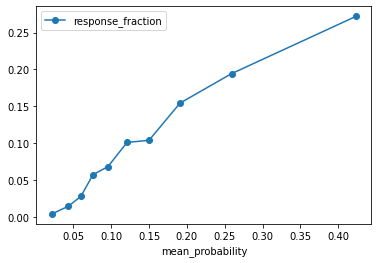

In [44]:
calib_table.plot(x='mean_probability', y='response_fraction', marker='o')

#  Receiver operating characteristic (ROC)

ROC AUC Score = 0.7654605968321881


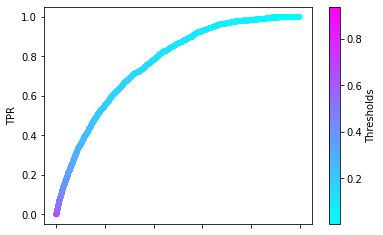

In [45]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

In [46]:
roc.head()

,Thresholds,FPR,TPR
0,0.937528,0.000095,0.000000
1,0.837060,0.000380,0.000000
2,0.813069,0.000380,0.000554
3,0.799831,0.000665,0.000554
4,0.795568,0.000665,0.001107


# Precision Recall Curve (PRC)

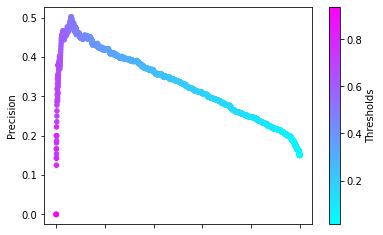

In [47]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

<hr>
Last update 2021-10-16 by Sumudu Tennakoon